In [1]:
# display output from all cmds just like Python shell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import platform
import IPython

import numpy as np
import pandas as pd
import sklearn

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


print('python.version = ', platform.python_version())
print('ipython.version =', IPython.version_info)
print('numpy.version = ', np.__version__)
print('pandas.version = ', pd.__version__)
print('sklearn.version = ', sklearn.__version__)
print('matplotlib.version = ', matplotlib.__version__)
print('seaborn.version = ', sns.__version__)

python.version =  3.4.3
ipython.version = (6, 2, 1, '')
numpy.version =  1.13.3
pandas.version =  0.20.3
sklearn.version =  0.19.1
matplotlib.version =  2.1.0
seaborn.version =  0.8.1


# Import respondent data

In [2]:
schema = pd.read_csv("../data/raw/schema.csv")
schema.head()
schema.describe()

,Column,Question,Asked
0,GenderSelect,Select your gender identity. - Selected Choice,All
1,GenderFreeForm,Select your gender identity. - A different ide...,All
2,Country,Select the country you currently live in.,All
3,Age,What's your age?,All
4,EmploymentStatus,What's your current employment status?,All


,Column,Question,Asked
count,290,290,290
unique,290,290,9
top,WorkMethodsFreeForm1,Which best describes your undergraduate major?...,CodingWorker
freq,1,1,161


# Explore respondent data

In [15]:
# Types of respondents
respondent_types = schema["Asked"].unique()
type(respondent_types)
print("Found", len(respondent_types), "unique respondent types")
respondent_types


numpy.ndarray

Found 9 unique respondent types


array(['All', 'Non-worker', 'Non-switcher', 'Worker1', 'Learners',
       'OnlineLearners', 'Worker', 'CodingWorker-NC', 'CodingWorker'], dtype=object)

In [16]:
# Questions per respondent type
q_per_respondent_type = schema["Asked"].value_counts()
type(q_per_respondent_type)
q_per_respondent_type


pandas.core.series.Series

CodingWorker       161
All                 70
Learners            41
Worker1              6
CodingWorker-NC      5
Worker               2
OnlineLearners       2
Non-worker           2
Non-switcher         1
Name: Asked, dtype: int64

**Note:** Data contains 9 different respondent types but "RespondentTypeREADME.txt" mentions only 7 different types. The other 2 respondent types are "Worker1" and "OnlineLearners"

[Text(0,0,'CodingWorker'),
 Text(0,0,'Learners'),
 Text(0,0,'Worker1'),
 Text(0,0,'CodingWorker-NC'),
 Text(0,0,'Worker'),
 Text(0,0,'OnlineLearners'),
 Text(0,0,'Non-worker'),
 Text(0,0,'Non-switcher')]

Text(0.5,1,'Total questions by respondent type')

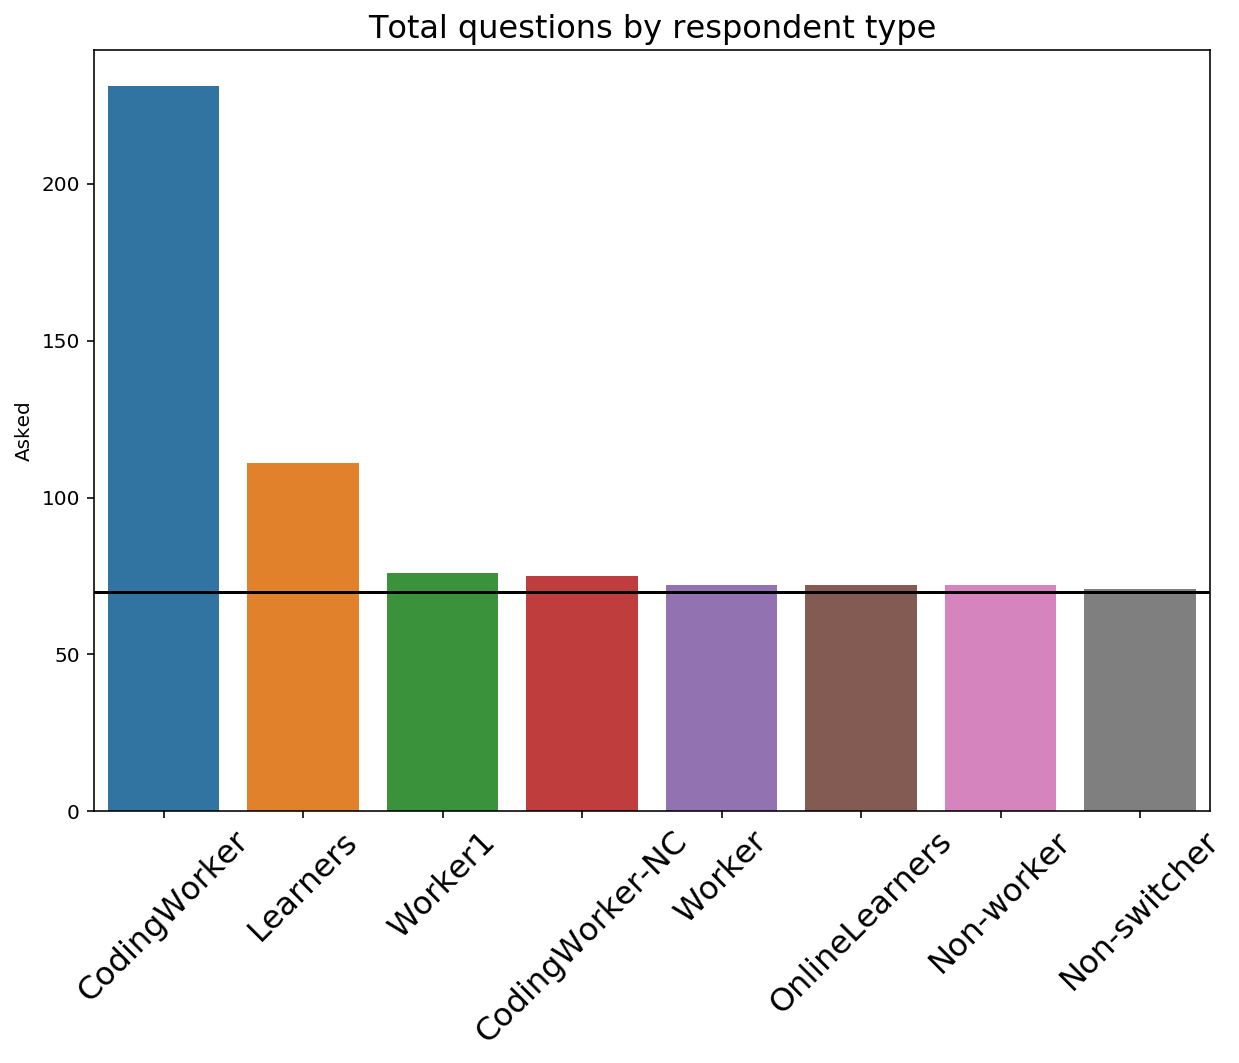

In [35]:
# Plot barplot of questions for each respondent type

common_q = q_per_respondent_type["All"]
specific_q = q_per_respondent_type.drop("All")

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,7))
ax = sns.barplot(x=specific_q.index, y=(common_q + specific_q), ax=axes)

ax.set_xticklabels(specific_q.index, fontdict={'fontsize': 16})
for t in ax.get_xticklabels():
   t.set_rotation(45)
ax.set_title("Total questions by respondent type", fontdict={'fontsize': 16})
plt.plot([-1, 9], [70, 70], color="black") # line representing common questions


### Info about Respondent Types:
* **All**: Every respondent was shown this question

* **Non-worker**: Respondents who indicated that they were "Not employed, and not looking for work" or "I prefer not to say"

* **Non-switcher**: Respondents that indicated that they were not actively looking to switch careers to data science.
* **Learners**: Respondents who indicated that they were either students, formally or informally learning data science skills, planning to transition into data science, or not employed but looking for work

* **Worker**: Respondents who indicted that they were "Employed full-time", "Employed part-time", "Independent contractor, freelancer, or self-employed", or "retired"
* **CodingWorker**: Respondents who indicated that they were "Employed full-time", "Employed part-time", or an "Independent contractor, freelancer, or self-employed" AND that they write code to analyze data in their current job
* **CodingWorker-NC**: Respondents who indicated that they were "Employed full-time" or "Employed part-time" AND that they write code to analyze data in their current job. 


# Findings

**#1:** The data has 2 respondent types that are missing from RespondentTypeREADME.txt:

* `Worker1` (Is this a typo? Is it supposed to be `Worker`?)
* `OnlineLearners` (Is this a subset of `Learners` or does `Learners` refer to "offline" learners only?)

---

**#2:** There seems to be a hierarchical structure in the respondent types. Is this characterization correct?

* `All`
  * `Non-worker`: Unemployed and not looking for work
  * `Worker`: Currently employed
    * Works in data science
      * `CodingWorker`: Writes code; + contractors
      * `CodingWorker-NC`: Writes code; - contractors
    * Works outside of data science
      * `Learners`: Wants to switch to data science 
      * `Non-switcher`: Does not want to switch to data science 
      